In [ ]:
# Import essential libraries for data manipulation, analysis, and visualization
import pandas as pd              # Data handling and manipulation
import numpy as np               # Numerical computations
import seaborn as sns            # Statistical data visualization
import matplotlib.pyplot as plt  # General plotting


In [ ]:
# Load the housing dataset from a local CSV file
df = pd.read_csv("house_data.csv")


In [ ]:
# Display the first 5 rows of the dataset to get an initial overview
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Display dataset structure, column names, data types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Drop irrelevant columns ('id' and 'date') as they do not contribute to analysis or modeling
df.drop(columns=["id", "date"], inplace=True)

# Preview the updated dataset
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Check for missing values in each column
df.isna().sum()


,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
grade,0


<Axes: >

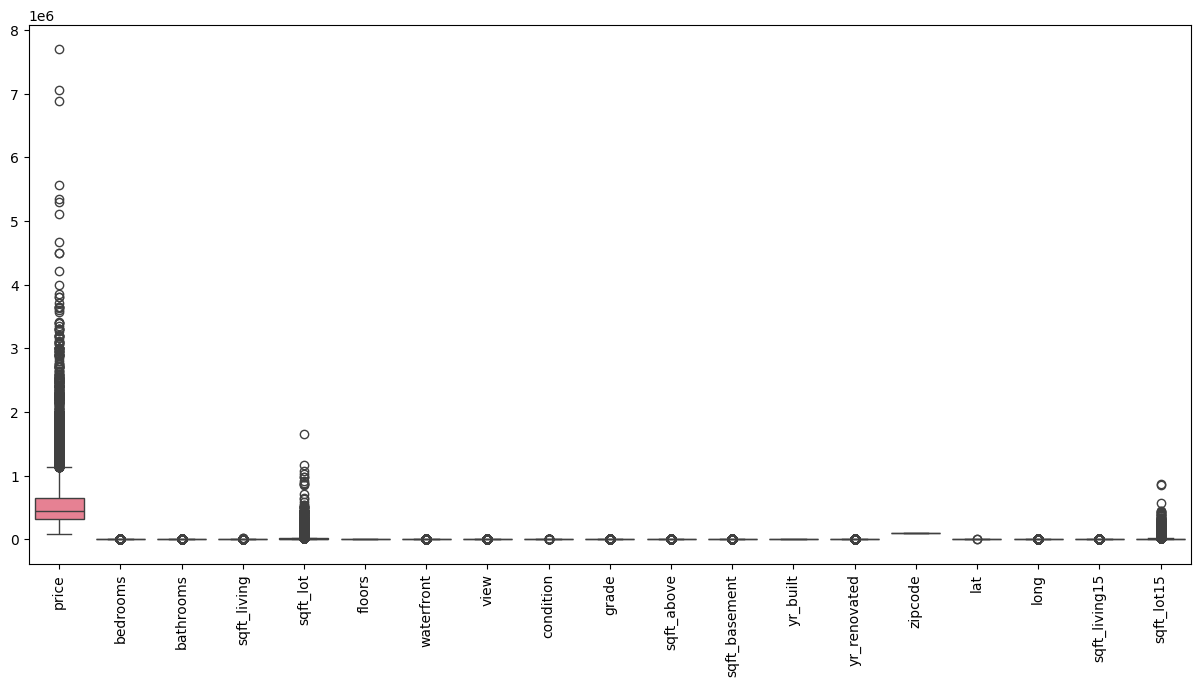

In [ ]:
# Plot boxplots for all numerical features to detect potential outliers
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.boxplot(df)


In [ ]:
# Create a copy of the dataset for outlier handling and transformation
df_copy = df.copy()

# Columns to check and remove outliers using IQR method
cols = ["price", "sqft_lot", "sqft_lot15"]

for col in cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.4  # custom threshold for outlier detection
    outliers = ((df_copy[col] < Q1 - IQR * threshold) | (df_copy[col] > Q3 + IQR * threshold))
    df_copy = df_copy[~outliers]  # remove outliers

# Apply log transformation to reduce skewness and normalize scale for selected features
df_copy["price"] = np.log1p(df_copy["price"])
df_copy["sqft_lot"] = np.log1p(df_copy["sqft_lot"])
df_copy["sqft_above"] = np.log1p(df_copy["sqft_above"])
df_copy["sqft_living15"] = np.log1p(df_copy["sqft_living15"])
df_copy["sqft_living"] = np.log1p(df_copy["sqft_living"])
df_copy["sqft_basement"] = np.log1p(df_copy["sqft_basement"])
df_copy["yr_renovated"] = np.log1p(df_copy["yr_renovated"])


<Axes: >

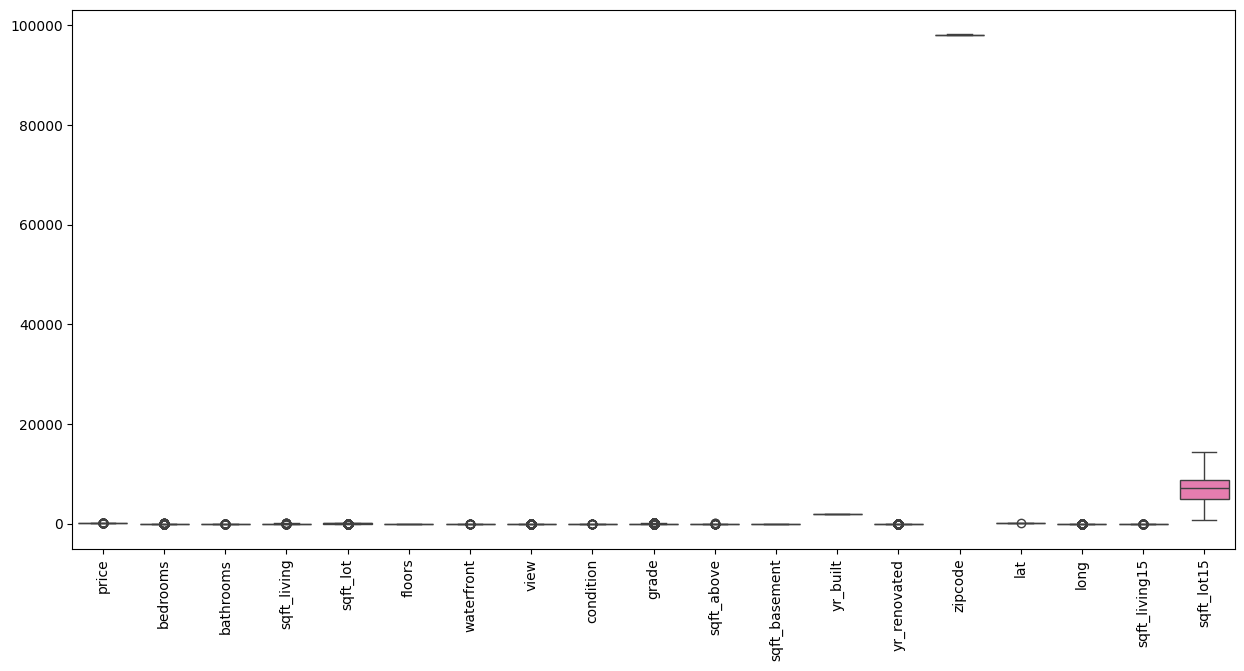

In [ ]:
# Plot boxplots after outlier removal and log transformation
# This helps verify reduced skewness and fewer extreme values in the dataset
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.boxplot(df_copy)


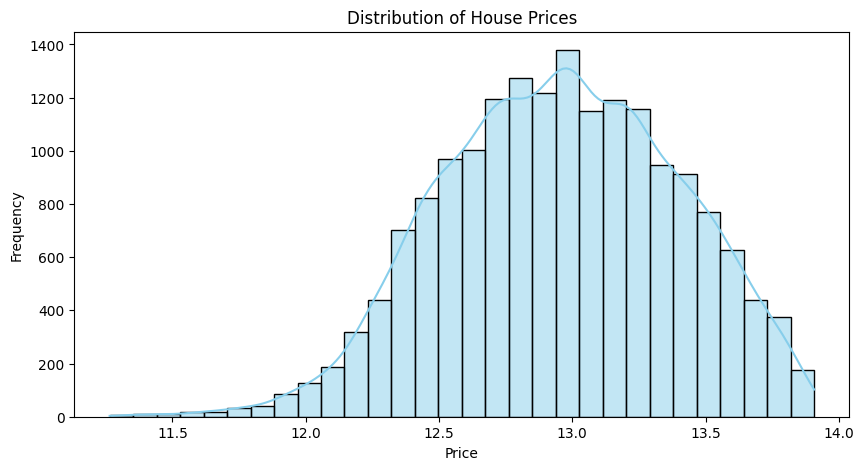

In [ ]:
# Plot the distribution of the target variable ("price") after log transformation
# The histogram with KDE shows how the transformation reduces skewness
plt.figure(figsize=(10,5))
sns.histplot(df_copy["price"], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Compute the correlation matrix for all numeric features
corr = df_copy.corr(numeric_only=True)
corr


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.281523,0.431503,0.572382,-0.055178,0.274968,0.042596,0.212800,0.039636,0.594555,0.467594,0.214158,0.039838,0.082276,0.010124,0.517605,0.038182,0.512738,-0.070705
bedrooms,0.281523,1.000000,0.485782,0.625677,0.243591,0.143011,-0.015382,0.036929,0.022685,0.309843,0.505084,0.179573,0.157947,0.006565,-0.160592,-0.045956,0.155034,0.391771,0.188767
bathrooms,0.431503,0.485782,1.000000,0.723626,-0.055640,0.511809,-0.001725,0.085868,-0.148085,0.600815,0.651597,0.154500,0.549665,0.029349,-0.218569,-0.025143,0.260607,0.537293,-0.034973
sqft_living,0.572382,0.625677,0.723626,1.000000,0.233735,0.340626,0.000102,0.143684,-0.061640,0.668823,0.836565,0.265470,0.357622,0.022623,-0.222157,-0.005237,0.274790,0.716972,0.187120
sqft_lot,-0.055178,0.243591,-0.055640,0.233735,1.000000,-0.466254,0.020186,0.047037,0.155166,-0.009255,0.197095,-0.007517,-0.141682,-0.004451,-0.250450,-0.168975,0.253411,0.264806,0.855042
floors,0.274968,0.143011,0.511809,0.340626,-0.466254,1.000000,-0.004507,-0.013400,-0.287360,0.470518,0.542276,-0.296778,0.524378,0.000430,-0.073691,0.019646,0.147739,0.262224,-0.383257
waterfront,0.042596,-0.015382,-0.001725,0.000102,0.020186,-0.004507,1.000000,0.231879,0.010205,-0.008291,-0.006218,0.006828,-0.024660,0.036929,0.043042,-0.026546,-0.018451,0.010426,0.036366
view,0.212800,0.036929,0.085868,0.143684,0.047037,-0.013400,0.231879,1.000000,0.029667,0.124040,0.056901,0.160890,-0.074552,0.061616,0.120216,0.014887,-0.090041,0.173772,0.048928
condition,0.039636,0.022685,-0.148085,-0.061640,0.155166,-0.287360,0.010205,0.029667,1.000000,-0.182461,-0.173018,0.148180,-0.363667,-0.059837,0.000642,0.005370,-0.102397,-0.121204,0.135880
grade,0.594555,0.309843,0.600815,0.668823,-0.009255,0.470518,-0.008291,0.124040,-0.182461,1.000000,0.681696,0.018706,0.495600,-0.014500,-0.190877,0.076809,0.225634,0.635893,0.046797


In [ ]:
# Calculate the correlation matrix for all numeric columns
corr = df_copy.corr(numeric_only=True)

# Sort features by their absolute correlation with 'price' (highest to lowest)
imp_feature = np.abs(corr["price"]).sort_values(ascending=False)
imp_feature

# Drop features with very low correlation or less importance to the target 'price'
df_copy.drop(columns=["yr_renovated", "sqft_lot15", "sqft_lot",
                    "waterfront", "yr_built", "condition",
                    "long", "zipcode"], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df_copy.drop(columns=["price"])
y = df_copy["price"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Select only numerical columns that need scaling
num_cols = [
    'bedrooms', 'bathrooms', 'sqft_living', 'floors',
    'view', 'grade', 'sqft_above', 'sqft_basement',
    'lat', 'sqft_living15'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform training set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Apply the same transformation to the test set
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
# Print the shape (rows, columns) of training and testing sets
print("Training set size:", X_train.shape)   # Number of rows & columns in training data
print("Testing set size:", X_test.shape)     # Number of rows & columns in testing data


Training set size: (14080, 10)
Testing set size: (3520, 10)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
model = LinearRegression()


In [ ]:
# Train the model on the training set
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)   # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)    # Mean Squared Error
rmse = root_mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)               # R-squared (coefficient of determination)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.19626949224315823
Mean Squared Error (MSE): 0.06482371069048183
Root Mean Squared Error (RMSE): 0.25460500916219586
R² Score: 0.6614087698547388


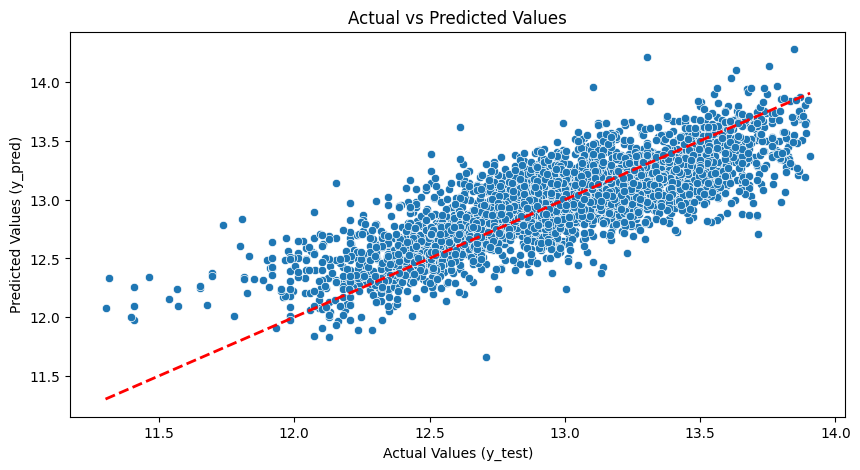

In [ ]:
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred)

# Add diagonal line (perfect predictions line)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red", linestyle="--", linewidth=2
)

# Labels and title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.show()


# **ANN(deep learning)**


In [ ]:
df.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
grade,0


In [ ]:
df.duplicated().sum()

np.int64(5)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model= Sequential()

In [ ]:
df.sample(9)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3922,431500.0,2,2.00,1370,4866,1.0,0,0,3,8,1370,0,2005,0,98053,47.7040,-122.012,1365,4784
3667,397000.0,3,3.50,1360,1275,2.0,0,0,3,8,1240,120,2007,0,98144,47.5904,-122.315,1360,1275
6851,470101.0,4,2.50,2320,7800,2.0,0,0,3,8,2320,0,1986,0,98028,47.7738,-122.266,2090,5721
113,329950.0,3,1.75,2080,5969,1.0,0,2,3,7,1080,1000,1971,0,98108,47.5474,-122.295,2090,5500
5618,435000.0,3,1.75,2030,13700,1.0,0,0,3,8,1630,400,1976,0,98011,47.7726,-122.197,2120,11200
5678,575000.0,3,1.75,1720,5956,2.0,0,0,3,8,1720,0,1981,0,98033,47.6875,-122.202,1620,9324
14663,630000.0,3,1.00,1590,4080,1.5,0,0,3,7,1590,0,1922,0,98105,47.6620,-122.326,1570,4080
12293,198000.0,3,1.75,1300,6318,1.0,0,0,3,7,1300,0,1980,0,98001,47.2752,-122.251,1150,8002
4090,462500.0,2,2.00,1540,7290,2.0,0,0,3,7,1540,0,1948,1983,98136,47.5510,-122.395,1540,7072


In [ ]:
df.shape

(21613, 19)

In [ ]:
x=df.drop('price',axis=1)
y=df['price']

# **Train_Test_split**


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_test.shape

(4323, 18)

In [ ]:
x_train

array([[-0.39526335, -0.47445144, -0.32393262, ...,  0.44228847,
         1.12607326,  0.01344043],
       [-1.46896378, -1.45258323, -1.18365301, ..., -0.53995821,
        -1.04652268, -0.28066159],
       [-0.39526335, -1.45258323, -1.09547656, ..., -0.86025604,
        -1.19331971, -0.1789339 ],
       ...,
       [-0.39526335,  0.50368036,  0.05081729, ...,  1.29641601,
        -0.42997519, -0.36604019],
       [-2.54266422, -1.77862716, -1.8670205 , ..., -0.77484328,
        -1.19331971,  0.08265159],
       [ 0.67843709,  0.50368036,  1.16404497, ...,  0.81952813,
         1.52242522, -0.24443927]])

In [ ]:
x_train.shape

(17290, 18)

# **Model_architecture**

In [ ]:
model.add(Dense(128,activation='relu', input_dim=18))

model.add(Dense(64,activation='relu'))

model.add(Dense(4,activation='relu'))

model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,953 (42.79 KB)

 Trainable params: 10,953 (42.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=32,epochs=100,validation_split=0.2)

Epoch 1/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 417982316544.0000 - mean_absolute_error: 536588.6875 - val_loss: 360528576512.0000 - val_mean_absolute_error: 507568.6250
Epoch 2/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 333529841664.0000 - mean_absolute_error: 468782.1875 - val_loss: 115729596416.0000 - val_mean_absolute_error: 257243.2500
Epoch 3/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 104135327744.0000 - mean_absolute_error: 230238.7031 - val_loss: 67501969408.0000 - val_mean_absolute_error: 195969.8750
Epoch 4/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69055668224.0000 - mean_absolute_error: 191298.9844 - val_loss: 60047138816.0000 - val_mean_absolute_error: 184554.3594
Epoch 5/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 63443697664.0000 - mean_absolute_error: 181403.8594 - val_loss: 53908566016.0000 - val_mean_absolute_error: 173288.6875
Epoch 6/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51861970944.0000 - mean_absol

In [ ]:
y_pred=model.predict(x_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Regression Metrics**

In [ ]:
ann_r2 = r2_score(y_test, y_pred)
ann_mae = mean_absolute_error(y_test, y_pred)
ann_rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [ ]:
ann_r2

0.7890418472188461

In [ ]:
ann_mae

105998.06812398798

In [ ]:
ann_rmse

np.float64(178583.20178906663)

In [ ]:
history.history

{'loss': [417447903232.0,
  263192117248.0,
  86178734080.0,
  66075758592.0,
  59635720192.0,
  54471708672.0,
  49955942400.0,
  45971435520.0,
  42555830272.0,
  39863517184.0,
  37870706688.0,
  36454764544.0,
  35391963136.0,
  34748542976.0,
  34123423744.0,
  33804625920.0,
  33372911616.0,
  33076439040.0,
  32848019456.0,
  32659351552.0,
  32419414016.0,
  32208656384.0,
  32099438592.0,
  31884662784.0,
  31738490880.0,
  31613216768.0,
  31478398976.0,
  31331880960.0,
  31218839552.0,
  31101167616.0,
  31006332928.0,
  30964811776.0,
  30794745856.0,
  30714550272.0,
  30635315200.0,
  30531694592.0,
  30472865792.0,
  30404413440.0,
  30226982912.0,
  30248359936.0,
  30141851648.0,
  30085373952.0,
  29998874624.0,
  29930569728.0,
  29861488640.0,
  29794420736.0,
  29722454016.0,
  29657489408.0,
  29571760128.0,
  29522812928.0,
  29508982784.0,
  29397757952.0,
  29419638784.0,
  29315282944.0,
  29251377152.0,
  29152866304.0,
  29158199296.0,
  29121996800.0,
  29

In [ ]:
import matplotlib.pyplot as plt

# **Model is performing good , so no Overfitting or Underfitting **

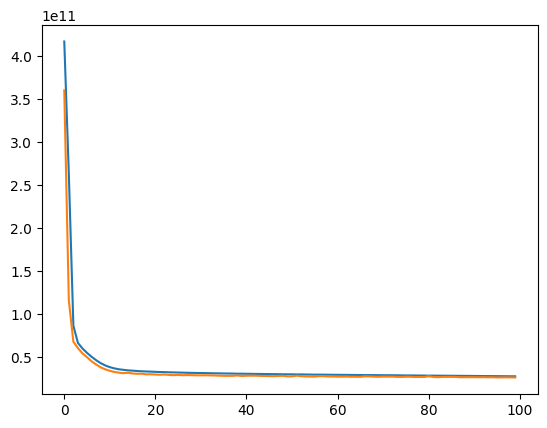

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


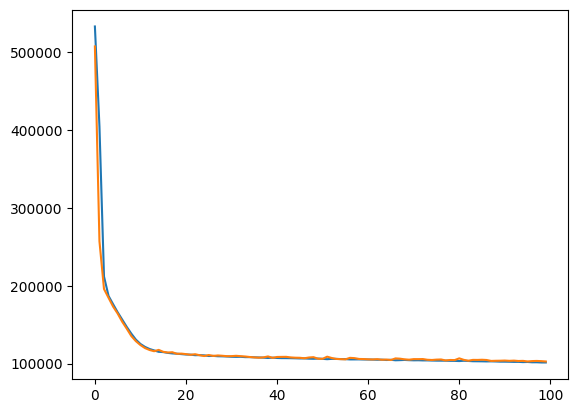

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

As ANN  model r2 score is much more greater than linear regression model like ANN R2 Score is =78.9% and Linear Regression model R2 score is 66%,ANN is performing much more better in this problem statement ,As we can see visualiazation also no overfitting or etc ANN  model is perfect .